In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import cohen_kappa_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.experimental import enable_halving_search_cv
#from sklearn.model_selection import HalvingRandomSearchCV


In [2]:
#test_run = True
test_run = False

In [3]:
df = pd.read_csv("Temp/df_proc_train_set_xgb.csv")
importance = pd.read_csv('Temp/most_important_features_xgb_names.csv')

In [4]:
df['sol_category'] = pd.to_numeric(df['sol_category'], downcast='integer')
df

,Id,smiles,sol_category,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,...,rdkit_desc_fr_quatN,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,EOS37839,O=C(NCCCc1nc(=O)[nH][nH]1)[C@H]1CCC(F)(F)C1,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,EOS2088,Cc1ccc(C(=O)NC2CCCC2)cc1S(=O)(=O)N1CCOCC1,2,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,EOS10587,COCCN1CCC(CN(C)S(=O)(=O)c2cccc(C(F)(F)F)c2)C1,2,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,EOS40533,O=C(Nc1ccc(F)cc1)NC1CCN(C(=O)Cc2cnn(-c3ccccc3)...,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:

from rdkit import Chem
from rdkit.Chem import Draw

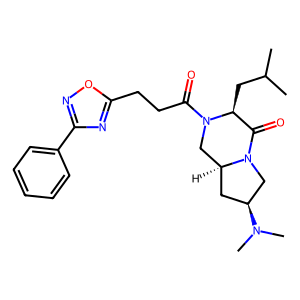

In [6]:
mol = Chem.MolFromSmiles(df['smiles'][50])
Draw.MolToImage(mol)

In [7]:
df['sol_category'].value_counts()

2    65835
1     2835
0     2041
Name: sol_category, dtype: int64

In [8]:
if test_run:
    df, _, __, ___ = train_test_split(df, df['sol_category'], train_size=500, stratify=df['sol_category'])

In [9]:
df['sol_category'].value_counts(normalize=True)

2    0.931043
1    0.040093
0    0.028864
Name: sol_category, dtype: float64

In [10]:
y = df.iloc[:, 2]

In [11]:
feature_list = importance['feature']
df = df.loc[:,feature_list]
df.shape

(70711, 1700)

In [12]:
#y = pd.read_excel(xl, 'y', header = None)

In [13]:
# hypothesis fuction
# takes input variables and theta, return calculated output variable

In [14]:
print(len(df))
#print(len(y))
X = df.copy(deep=True)
#X.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X

70711


,rdkit_desc_NumAromaticRings,ecfp_2838,rdkit_desc_FractionCSP3,example_Zagreb Index,ecfp_3647,rdkit_desc_BertzCT,rdkit_desc_MolLogP,ecfp_2325,ecfp_2145,ecfp_2010,...,ecfp_3549,ecfp_2974,ecfp_3026,ecfp_725,ecfp_97,ecfp_684,ecfp_2030,ecfp_811,ecfp_958,ecfp_471
0,3.0,0,0.263158,154.0,0,1017.402055,2.60302,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,0,0.764706,110.0,0,508.002370,3.06012,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,0,0.285714,100.0,0,629.139730,1.63144,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0,0.473684,126.0,0,767.924514,5.24150,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0,0.210526,126.0,0,846.145135,3.15700,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,1.0,0,0.727273,96.0,0,496.884668,0.58220,0,0,0,...,0,1,0,0,0,0,0,0,0,0
70707,1.0,0,0.588235,126.0,0,705.300769,1.68832,0,0,0,...,0,1,0,0,0,0,0,0,0,0
70708,1.0,0,0.625000,128.0,0,679.447668,2.29420,0,0,0,...,0,1,0,0,0,0,0,0,0,0
70709,3.0,0,0.260870,160.0,0,1027.635100,3.36660,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
70706    2
70707    2
70708    2
70709    2
70710    2
Name: sol_category, Length: 70711, dtype: int8

In [16]:
y.unique()

array([0, 1, 2], dtype=int8)

## StandardScaler

In [17]:
#scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X)
#X = scaler.fit_transform(X)

## split

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1,  shuffle=True, stratify=y)

In [19]:
# find out where NaN is, remove in processing

## multi-class logistic regression

In [20]:
#clf = LogisticRegression(random_state=0, max_iter=1000, verbose=1).fit(X_train, y_train)

In [21]:
#clf.predict(X[:2, :])

In [22]:
#clf.predict_proba(X[:2, :])

In [23]:
#y_prediction = clf.predict(X_test)

In [24]:
#df_y = pd.DataFrame(y_prediction)

In [25]:
# Stricter feature selection
### 1. just use ecfp/rdkit+example
### 2. Hyperparatuning (StratifiedKfold+RandomizedSearchCV on X_train and y_train) (max_iter, solver, penalty,C)

# for dataset over all_dataset
#   hyperparameter tuning()

In [26]:
from sklearn.utils import class_weight
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import cohen_kappa_score
from numpy import linspace

In [27]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [28]:
all_dataset = list()
all_dataset.append(X)
#all_dataset.append(X_ecfp)
#all_dataset.append(X_desc)
#all_dataset.append(X_example)
#all_dataset.append(X_rdd)

In [29]:

# setup parameters for xgboost
params = {}
#params['booster'] = 'gbtree' #['gbtree', 'gblinear', 'dart']
#params['objective'] = ['binary:logistic']
#params["eval_metric"] = ["error"]
params['eta'] = 0.001 #, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] # boosting learning rate
params['gamma'] = 0.5 #linspace(0.000000001, 1.0, num=11) # min loss red recuired for further partition on leaf node
params['max_depth'] = 7 #np.arange(1, 11, 2) # max tree dept for base learners
params['n_estimators'] = 100 #np.arange(50, 550, 50) maybe 250 ??
params['min_child_weight'] = 1 # min sum of instance weight in a child
params['max_delta_step'] = 0 # max delta step allowed for each tree's weight estimate
params['subsample']= 0.5 #[0.5, 1] # subsample ratio of training instance
params['colsample_bytree'] = 1 # subsample ratio of columns when cunstructing each tree
#params['silent'] = [1]
#params['seed'] = [0] # = random_state ???
params['base_score'] = 0.5 # initial prediction score, global bias
#params['random_state'] = [0] # = seed ???
#params['scale_pos_weight'] = ratio
params['n_jobs'] = 5




In [30]:
i = 1

for dataset in all_dataset:
    '''
    # apply StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(dataset)
    dataset = scaler.fit_transform(dataset)
    '''
    
    # split data set
    StratifiedKFold(n_splits=5)
    X_train, X_val, y_train, y_val = train_test_split(dataset, y, random_state=1,  shuffle=True, stratify=y)#, test_size=0.2, train_size=0.8)

    # define class weights
    classes_weights = class_weight.compute_sample_weight(
        class_weight='balanced',
        y=y_train
        )

    model = XGBClassifier(**params)

    model.fit(X_train, y_train, sample_weight=classes_weights)


    valPredictions = model.predict(X_val)

    #quad kappa score
    sk_quad_kappa = cohen_kappa_score(y_val, valPredictions, weights='quadratic')
    
    #define data set name
    if i == 1:
        dataset_name = 'X'
    #elif i == 2:
        #dataset_name = 'X_ecfp'
    #elif i == 3:
        #dataset_name = 'X_desc'
    #i +=1
    
    # printing results
    print(f'quadratic kappa score of data set {dataset_name}: {sk_quad_kappa}')



quadratic kappa score of data set X: 0.08069473788228443


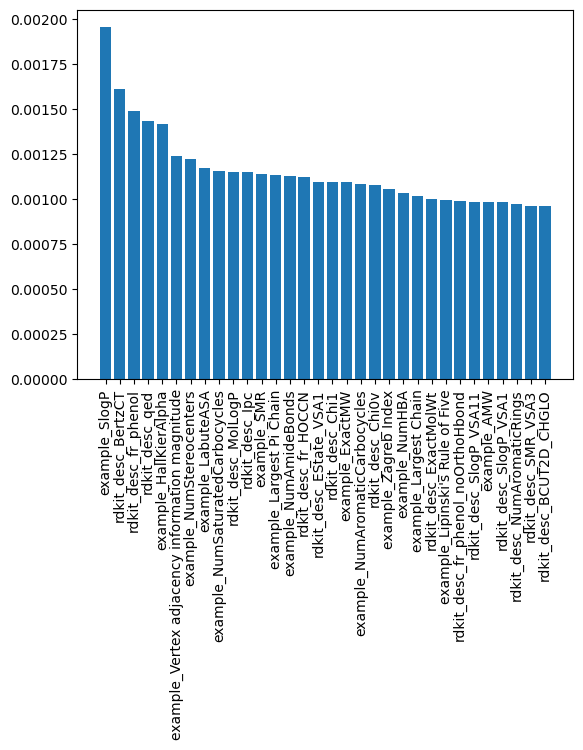

In [49]:
importance_df = pd.DataFrame(data={
    'feature': dataset.columns,
    'importance': model.feature_importances_
}).sort_values(by=['importance'], ascending=False).head(200)

importance_df = importance_df[importance_df['feature'].str.contains('ecfp')==False]
#importance_name_df = df[[col for col in df.columns if (col.startswith('rdkit_') or col.startswith('example_'))]]

import matplotlib.pyplot as plt
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

In [50]:
importance_df

,feature,importance
57,example_SlogP,0.001955
5,rdkit_desc_BertzCT,0.001614
172,rdkit_desc_fr_phenol,0.001491
25,rdkit_desc_qed,0.001432
367,example_HallKierAlpha,0.001416
80,example_Vertex adjacency information magnitude,0.001238
35,example_NumStereocenters,0.001222
553,example_LabuteASA,0.001173
541,example_NumSaturatedCarbocycles,0.001157
6,rdkit_desc_MolLogP,0.001153


In [46]:
importance_df

,feature,importance
57,example_SlogP,0.001955
5,rdkit_desc_BertzCT,0.001614
172,rdkit_desc_fr_phenol,0.001491
25,rdkit_desc_qed,0.001432
367,example_HallKierAlpha,0.001416


In [43]:
importance_df

,feature,importance
57,example_SlogP,0.001955
7,ecfp_2325,0.001748
8,ecfp_2145,0.001725
14,ecfp_1198,0.001640
16,ecfp_2941,0.001622
5,rdkit_desc_BertzCT,0.001614
18,ecfp_1152,0.001594
15,ecfp_507,0.001565
21,ecfp_3382,0.001543
22,ecfp_4075,0.001528


In [31]:

real_test_set = pd.read_csv('Temp/df_proc_test_set_xgb.csv')
sub_template = pd.read_csv('Data/submission_template_rdm.csv')
(sub_template['Id'] == real_test_set['Id']).value_counts()


True    30307
Name: Id, dtype: int64

In [32]:

real_test_set.drop(columns=['Id', 'smiles'], inplace=True)

'''
# apply StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(real_test_set)
real_test_set = scaler.fit_transform(real_test_set)
'''

# prediction
realtestPredictions = model.predict(real_test_set)
sub_template['pred'] = realtestPredictions


ValueError: Feature shape mismatch, expected: 1700, got 4335

In [ ]:
set(realtestPredictions)

{0, 1, 2}

In [ ]:

sub_template['pred'].value_counts()


2    25609
1     3020
0     1678
Name: pred, dtype: int64

In [ ]:
#sub_template

## save as csv

In [ ]:
#sub_template.to_csv('Submissions/submission_29_11_C-men.csv', index=False)

In [ ]:
model.feature_importances_

array([0.00028521, 0.00049658, 0.00020088, ..., 0.00094092, 0.00049538,
       0.00045614], dtype=float32)

In [ ]:
dataset.columns

Index(['ecfp_0', 'ecfp_1', 'ecfp_2', 'ecfp_3', 'ecfp_4', 'ecfp_5', 'ecfp_6',
       'ecfp_7', 'ecfp_8', 'ecfp_9',
       ...
       'rdkit_desc_fr_quatN', 'rdkit_desc_fr_sulfide',
       'rdkit_desc_fr_sulfonamd', 'rdkit_desc_fr_sulfone',
       'rdkit_desc_fr_term_acetylene', 'rdkit_desc_fr_tetrazole',
       'rdkit_desc_fr_thiazole', 'rdkit_desc_fr_thiophene',
       'rdkit_desc_fr_unbrch_alkane', 'rdkit_desc_fr_urea'],
      dtype='object', length=4335)

In [ ]:
importance_df = pd.DataFrame(data={
    'feature': dataset.columns,
    'importance': model.feature_importances_
}).sort_values(by=['importance'], ascending=False).head(1700)

In [ ]:
importance_df.to_csv('Temp/most_important_features_xgb_names.csv')

In [ ]:
#importance_df.to_csv('Temp/xgb_most_important_features.csv', index=False)

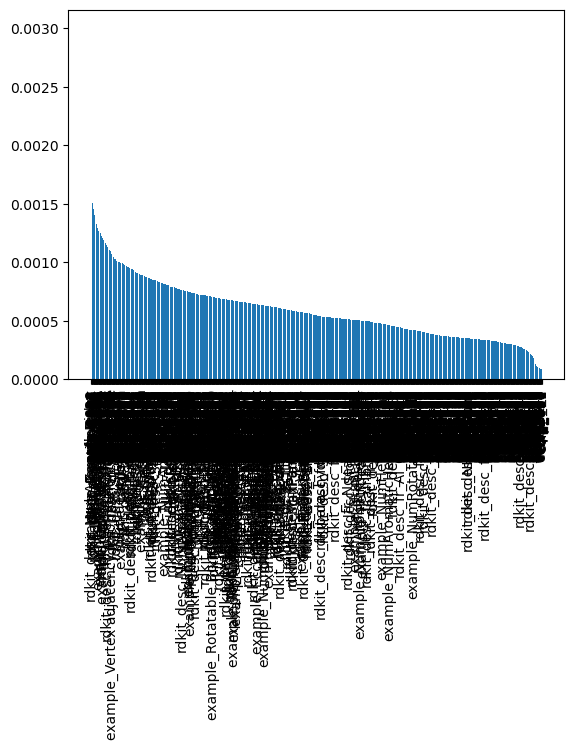

In [ ]:
import matplotlib.pyplot as plt
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
dataset.loc[:,['rdkit_desc_NumAromaticRings']].value_counts()

rdkit_desc_NumAromaticRings
2.0                            32786
1.0                            18527
3.0                            15343
4.0                             2764
0.0                             1144
5.0                              137
6.0                               10
dtype: int64

In [ ]:
dataset.loc[:,[ 'example_NumAromaticRings']].value_counts()

example_NumAromaticRings
2                           32784
1                           18527
3                           15344
4                            2764
0                            1144
5                             137
6                              10
8                               1
dtype: int64